# TASK 2: Prediction using Unsupervised ML
**Name: Amit Gawai**

**Technique Used: K-Means Clustering**

**URL for Data: Iris.csv**

Description: Predict the optimum number of clusters and represent it visually.

In [26]:
#Import all the libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets
from sklearn.cluster import KMeans

In [27]:
#Import data into Dataframes
df=pd.read_csv('Iris.csv')
print("Data Successfully Imported")

Data Successfully Imported


In [28]:
#Check the Data
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [29]:
#Shape of the Data
df.shape

(150, 6)

In [30]:
#Understand the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [31]:
#Get the Statistics related to data
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [32]:
#Check for Null Values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [33]:
#Check for Duplicate Values
print('Number of Duplicate values:',df.duplicated().sum())

Number of Duplicate values: 0


In [34]:
#Dropping the Column 'Id' since we already have
df.drop('Id',axis=1,inplace=True)

In [35]:
#Check for Columns after the Column drop
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [36]:
#Check for Columns after the Column drop
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [37]:
#Check for Shape after the Column drop
df.shape

(150, 5)

In [47]:
#Correaltion Matrix
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

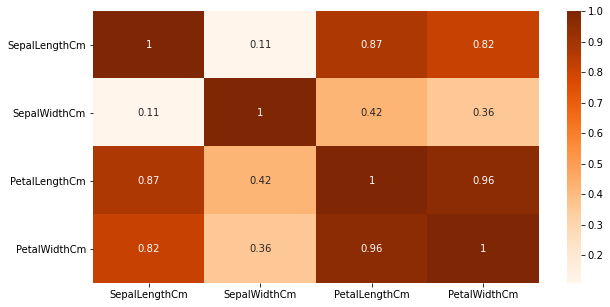

In [62]:
plt.figure(figsize=(10,5))
sns.heatmap(abs(df.corr()),cmap='Oranges',annot=True)

# Elbow Method

In [38]:
#Find Optimum number of Kmean Classifications
x=df.iloc[:,[0,1,2,3]].values

In [63]:
#Creating the Within Cluster Sum of Squares
wcss=[] #Empty List

for i in range(1,15):
    km=KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


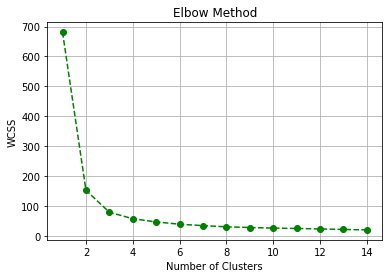

In [61]:
#Plotting the Cluster Range
plt.plot(range(1,15),wcss,'ro--',color='green')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [44]:
model = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
prediction = model.fit_predict(df.iloc[:,[0,1,2,3]])

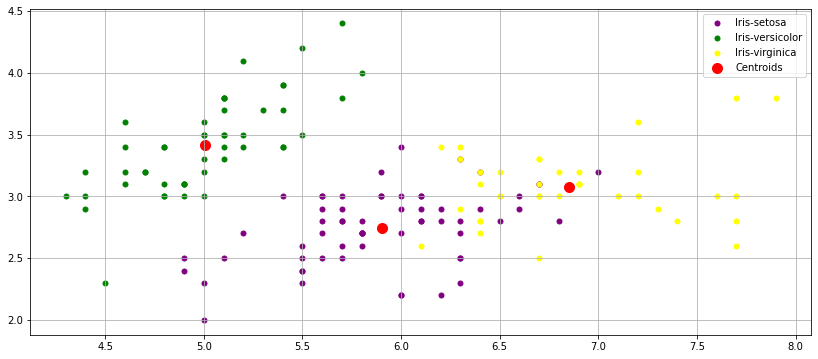

In [65]:
#Visualize of the Cluster
plt.figure(figsize=(14,6))
val = df.iloc[:,[0,1,2,3]].values
plt.scatter(val[prediction == 0,0],val[prediction == 0,1],s=25,c='purple',label='Iris-setosa')
plt.scatter(val[prediction == 1,0],val[prediction == 1,1],s=25,c='green',label='Iris-versicolor')
plt.scatter(val[prediction == 2,0],val[prediction == 2,1],s=25,c='yellow',label='Iris-virginica')

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=100,c='red',label='Centroids')
plt.grid()
plt.legend()